<a href="https://colab.research.google.com/github/albarpambagio/foodprice-forecasting/blob/main/food_price_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Set plotting styles
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/1. PROJECTS/Pacmann/forecasting/updated/wfp_food_prices_idn(1).csv')
df = df.loc[1::]

# general overview of the data
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2007-01-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Rice,KG,actual,Retail,IDR,5941.98,0.6521
2,2007-01-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Wheat flour,KG,actual,Retail,IDR,4328.26,0.475
3,2007-01-15,NaN,NaN,National Average,NaN,NaN,"meat, fish and eggs",Meat (beef),KG,actual,Retail,IDR,49165.11,5.3956
4,2007-01-15,NaN,NaN,National Average,NaN,NaN,"meat, fish and eggs","Meat (chicken, broiler)",KG,actual,Retail,IDR,20122.8,2.2084
5,2007-01-15,NaN,NaN,National Average,NaN,NaN,miscellaneous food,Sugar,KG,actual,Retail,IDR,6554.75,0.7194


In [ ]:
df.tail()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
205161,2024-03-15,SUMATERA UTARA,KOTA SIBOLGA,Pasar Nauli Sibolga,1.738378,98.78446,oil and fats,"Oil (vegetable, packaged)",KG,aggregate,Retail,IDR,22250.0,1.4272
205162,2024-03-15,SUMATERA UTARA,KOTA SIBOLGA,Pasar Nauli Sibolga,1.738378,98.78446,vegetables and fruits,"Chili (bird's eye, green)",KG,aggregate,Retail,IDR,54500.0,3.4958
205163,2024-03-15,SUMATERA UTARA,KOTA SIBOLGA,Pasar Nauli Sibolga,1.738378,98.78446,vegetables and fruits,Garlic,KG,aggregate,Retail,IDR,40500.0,2.5978
205164,2024-03-15,SUMATERA UTARA,KOTA SIBOLGA,Pasar Nauli Sibolga,1.738378,98.78446,vegetables and fruits,Garlic (medium),KG,aggregate,Retail,IDR,40500.0,2.5978
205165,2024-03-15,SUMATERA UTARA,KOTA SIBOLGA,Pasar Nauli Sibolga,1.738378,98.78446,vegetables and fruits,"Onions (shallot, medium)",KG,aggregate,Retail,IDR,46500.0,2.9827


In [ ]:
print(df.dtypes)

date         object
admin1       object
admin2       object
market       object
latitude     object
longitude    object
category     object
commodity    object
unit         object
priceflag    object
pricetype    object
currency     object
price        object
usdprice     object
dtype: object


In [ ]:
df.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,205165,203947,203947,205165,203947.000000,203947.000000,205165,205165,205165,205165,205165,205165,205165.0,205165.0000
unique,206,34,107,215,421.000000,421.000000,7,30,3,2,1,1,52250.0,55696.0000
top,2023-05-15,JAWA TENGAH,KOTA MEDAN,National Average,-3.965487,122.519735,vegetables and fruits,Rice,KG,aggregate,Retail,IDR,14000.0,0.9761
freq,3870,23864,4658,1218,767.000000,767.000000,70797,11601,204950,203947,205165,205165,2716.0,177.0000


In [ ]:
actual_food_df = df[(df['market'] != 'National Average')]

In [ ]:
actual_food_df.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,203947,203947,203947,203947,203947.000000,203947.000000,203947,203947,203947,203947,203947,203947,203947.0,203947.0000
unique,58,34,107,214,421.000000,421.000000,5,27,1,1,1,1,51127.0,55183.0000
top,2023-05-15,JAWA TENGAH,KOTA MEDAN,Pasar Kota,-3.965487,122.519735,vegetables and fruits,Rice,KG,aggregate,Retail,IDR,14000.0,0.9761
freq,3870,23864,4658,1117,767.000000,767.000000,70545,11443,203947,203947,203947,203947,2716.0,177.0000


In [ ]:
actual_food_df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1219,2016-07-15,ACEH,KOTA BANDA ACEH,Pasar Peunayong,5.560894,95.318847,cereals and tubers,Rice,KG,aggregate,Retail,IDR,9589.29,0.7326
1220,2016-07-15,ACEH,KOTA BANDA ACEH,Pasar Peunayong,5.560894,95.318847,cereals and tubers,Rice (low quality),KG,aggregate,Retail,IDR,9166.07,0.7002
1221,2016-07-15,ACEH,KOTA BANDA ACEH,Pasar Peunayong,5.560894,95.318847,"meat, fish and eggs","Meat (chicken, broiler)",KG,aggregate,Retail,IDR,31964.29,2.4419
1222,2016-07-15,ACEH,KOTA BANDA ACEH,Pasar Peunayong,5.560894,95.318847,miscellaneous food,Sugar,KG,aggregate,Retail,IDR,18714.29,1.4297
1223,2016-07-15,ACEH,KOTA BANDA ACEH,Pasar Peunayong,5.560894,95.318847,miscellaneous food,Sugar (local),KG,aggregate,Retail,IDR,17928.57,1.3696


In [ ]:
actual_food_df['admin2'].unique()

array(['KOTA BANDA ACEH', 'KOTA LHOKSEUMAWE', 'BULELENG', 'KOTA DENPASAR',
       'KOTA CILEGON', 'KOTA SERANG', 'KOTA TANGERANG', 'KOTA BENGKULU',
       'KOTA YOGYAKARTA', 'KOTA JAKARTA TIMUR', 'KOTA GORONTALO', 'BUNGO',
       'KOTA JAMBI', 'KOTA BANDUNG', 'KOTA BEKASI', 'KOTA BOGOR',
       'KOTA CIREBON', 'KOTA DEPOK', 'KOTA SUKABUMI', 'KOTA TASIKMALAYA',
       'BANYUMAS', 'CILACAP', 'KOTA SEMARANG', 'KOTA SURAKARTA',
       'KOTA TEGAL', 'KUDUS', 'BANYUWANGI', 'JEMBER', 'KOTA KEDIRI',
       'KOTA MALANG', 'KOTA SURABAYA', 'SUMENEP', 'KOTA PONTIANAK',
       'KOTA BANJARMASIN', 'TABALONG', 'KOTA PALANGKA RAYA',
       'KOTA BALIKPAPAN', 'KOTA SAMARINDA', 'KOTA TARAKAN', 'KOTA BATAM',
       'KOTA TANJUNGPINANG', 'KOTA BANDAR LAMPUNG', 'KOTA AMBON',
       'KOTA TUAL', 'MALUKU TENGGARA', 'KOTA TERNATE', 'KOTA MATARAM',
       'KOTA KUPANG', 'KOTA JAYAPURA', 'KOTA SORONG', 'MANOKWARI',
       'INDRAGIRI HILIR', 'KAMPAR', 'KOTA DUMAI', 'KOTA PEKANBARU',
       'MAMUJU', 'BONE', 'BU

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

date            0
admin1       1218
admin2       1218
market          0
latitude     1218
longitude    1218
category        0
commodity       0
unit            0
priceflag       0
pricetype       0
currency        0
price           0
usdprice        0
dtype: int64

## Data Definition

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [ ]:
print(df.dtypes)

date         datetime64[ns]
admin1               object
admin2               object
market               object
latitude             object
longitude            object
category             object
commodity            object
unit                 object
priceflag            object
pricetype            object
currency             object
price               float64
usdprice             object
dtype: object


## Focusing On Aggregate Food Data

In [ ]:
# Filter the DataFrame where 'market' is 'National Average'
national_food_df = df[(df['market'] == 'National Average') & (df['category'] != 'non-food')]

In [ ]:
national_food_df = national_food_df.drop(['admin1', 'admin2', 'market', 'latitude', 'longitude', 'category', 'unit', 'priceflag', 'pricetype', 'currency', 'usdprice'], axis=1)
national_food_df.columns

Index(['date', 'commodity', 'price'], dtype='object')

In [ ]:
# Create the plot
fig = px.line(national_food_df, x='date', y='price', color='commodity',
              title='Overall Food Price Trends for Different Commodities Over Time',
              labels={'price': 'Price', 'index': 'Date', 'commodity': 'Commodity'})

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price')

fig.show()


# Timeseries Decomposition

## Linear regression Trend Analysis


In [ ]:
lr_ts = national_food_df.copy()
lr_ts.head()

,date,commodity,price
1,2007-01-15,Rice,5941.98
2,2007-01-15,Wheat flour,4328.26
3,2007-01-15,Meat (beef),49165.11
4,2007-01-15,"Meat (chicken, broiler)",20122.80
5,2007-01-15,Sugar,6554.75


In [ ]:
lr_ts = lr_ts.set_index("date")

In [ ]:
lr_ts['Time'] = np.arange(len(lr_ts.index))

lr_ts.head()

,commodity,price,Time
date,,,
2007-01-15,Rice,5941.98,0
2007-01-15,Wheat flour,4328.26,1
2007-01-15,Meat (beef),49165.11,2
2007-01-15,"Meat (chicken, broiler)",20122.80,3
2007-01-15,Sugar,6554.75,4


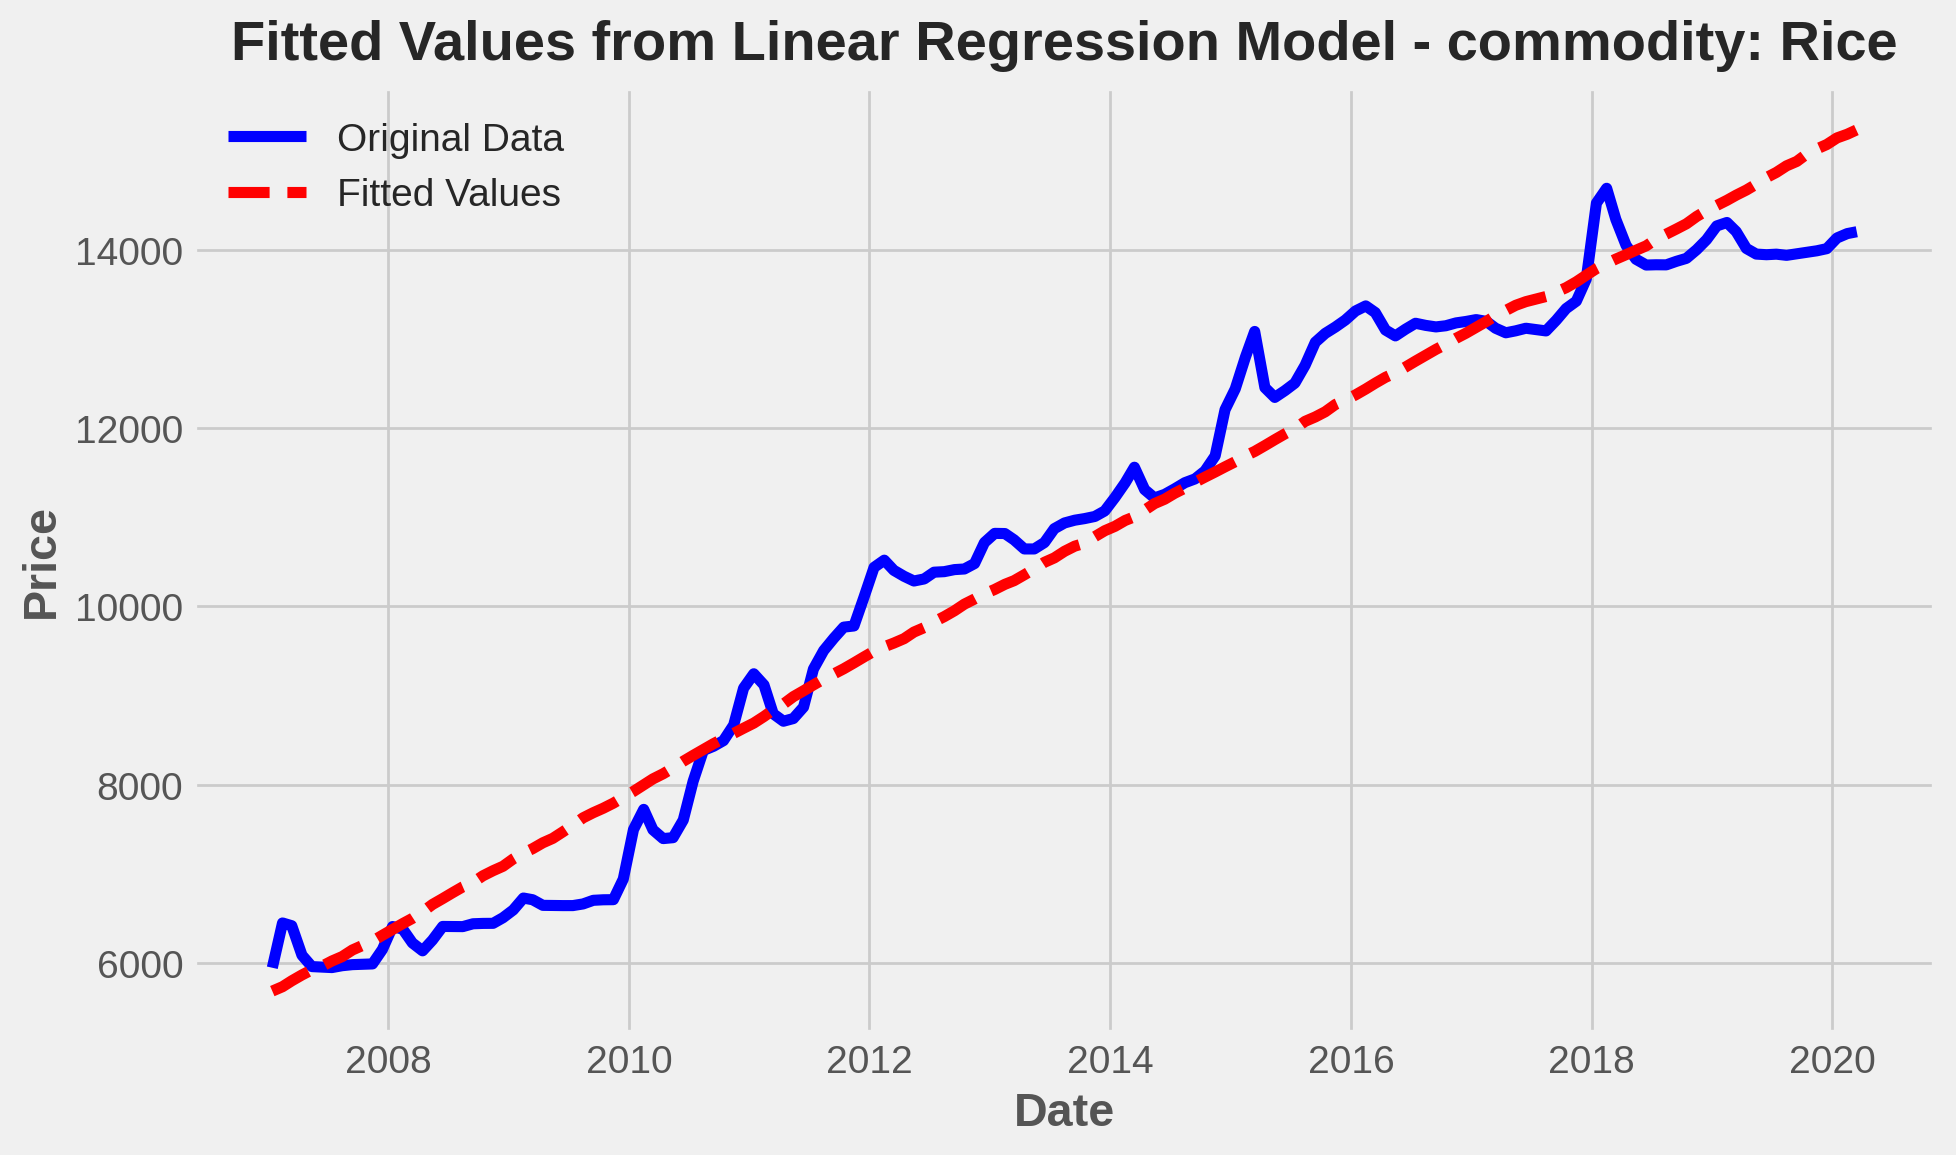

<Figure size 1100x500 with 0 Axes>

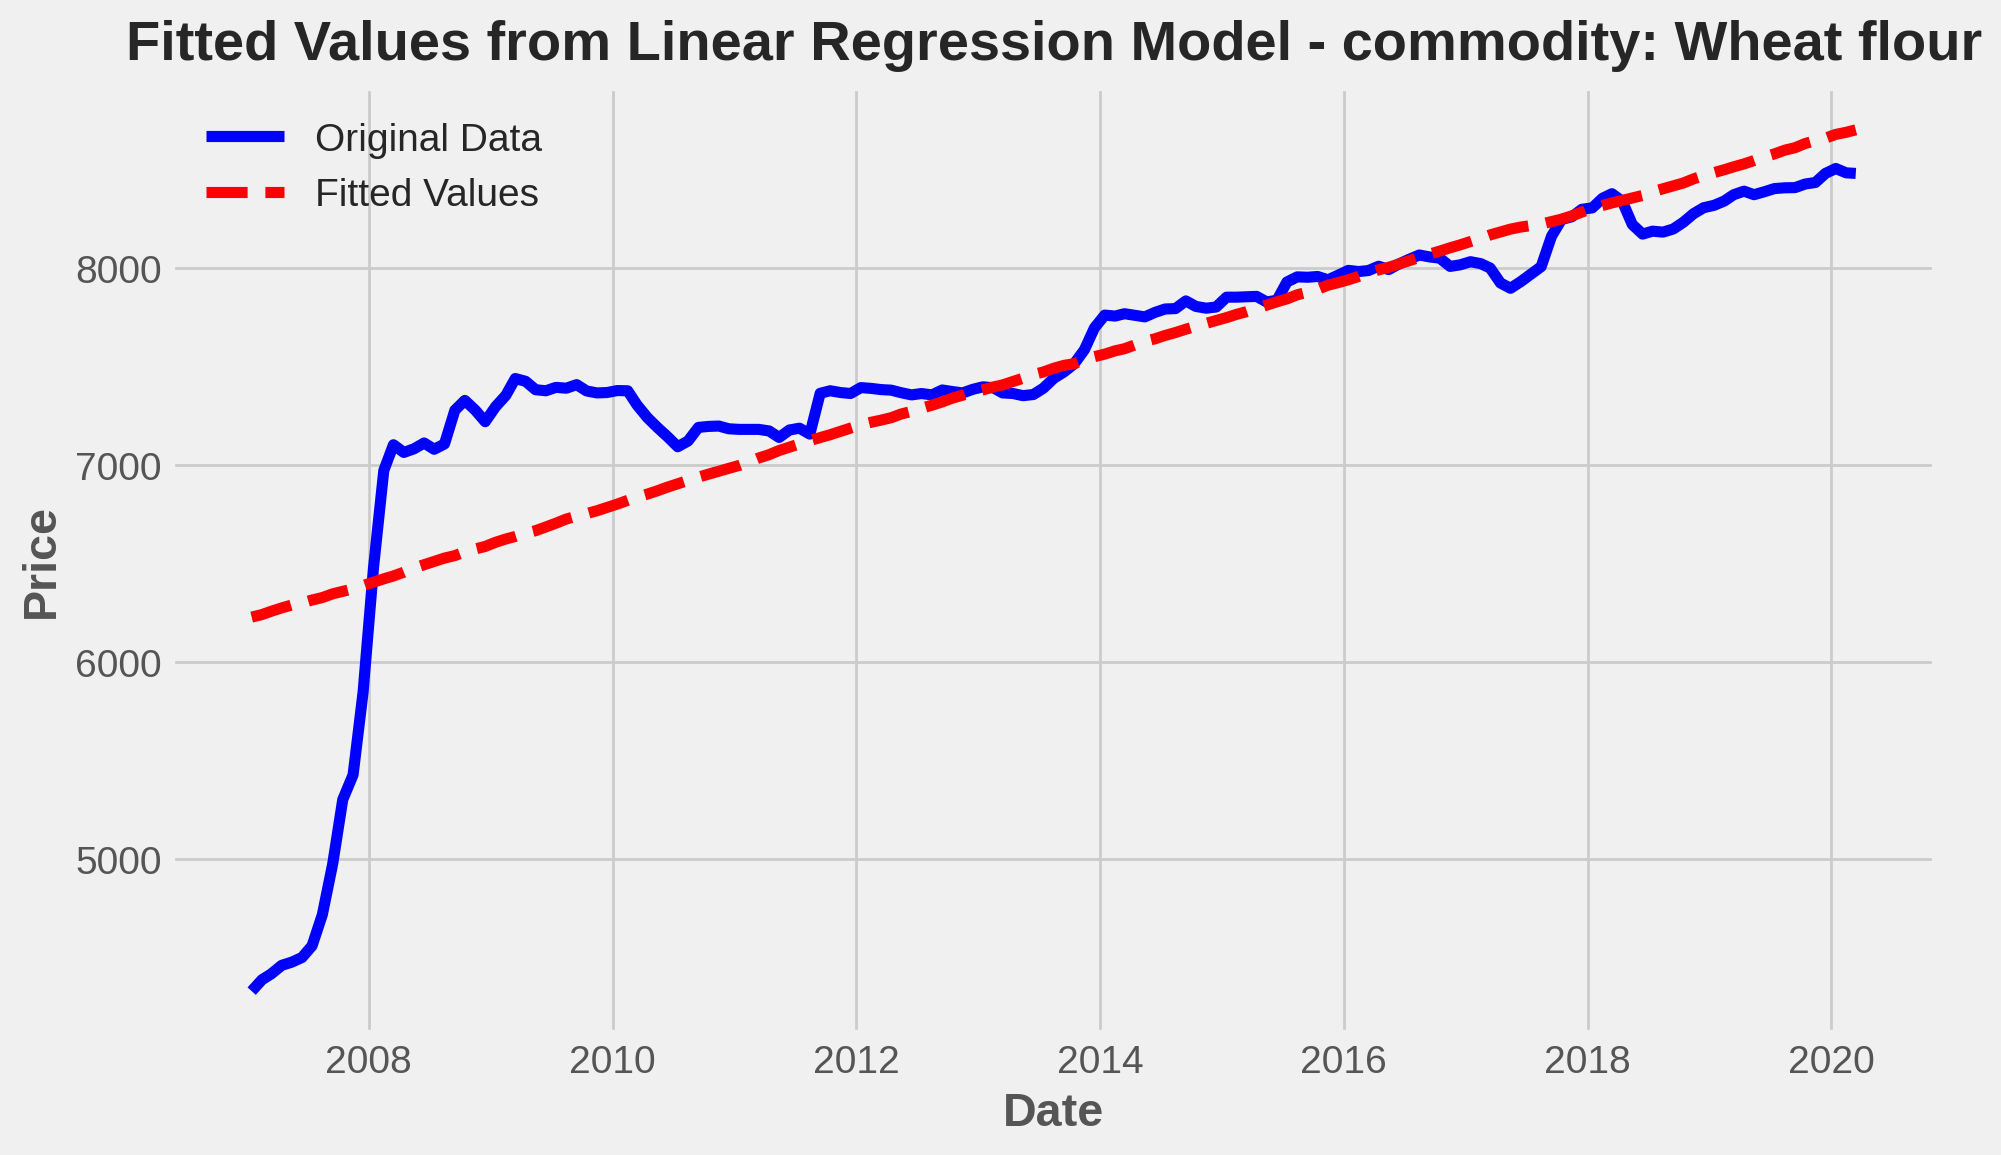

<Figure size 1100x500 with 0 Axes>

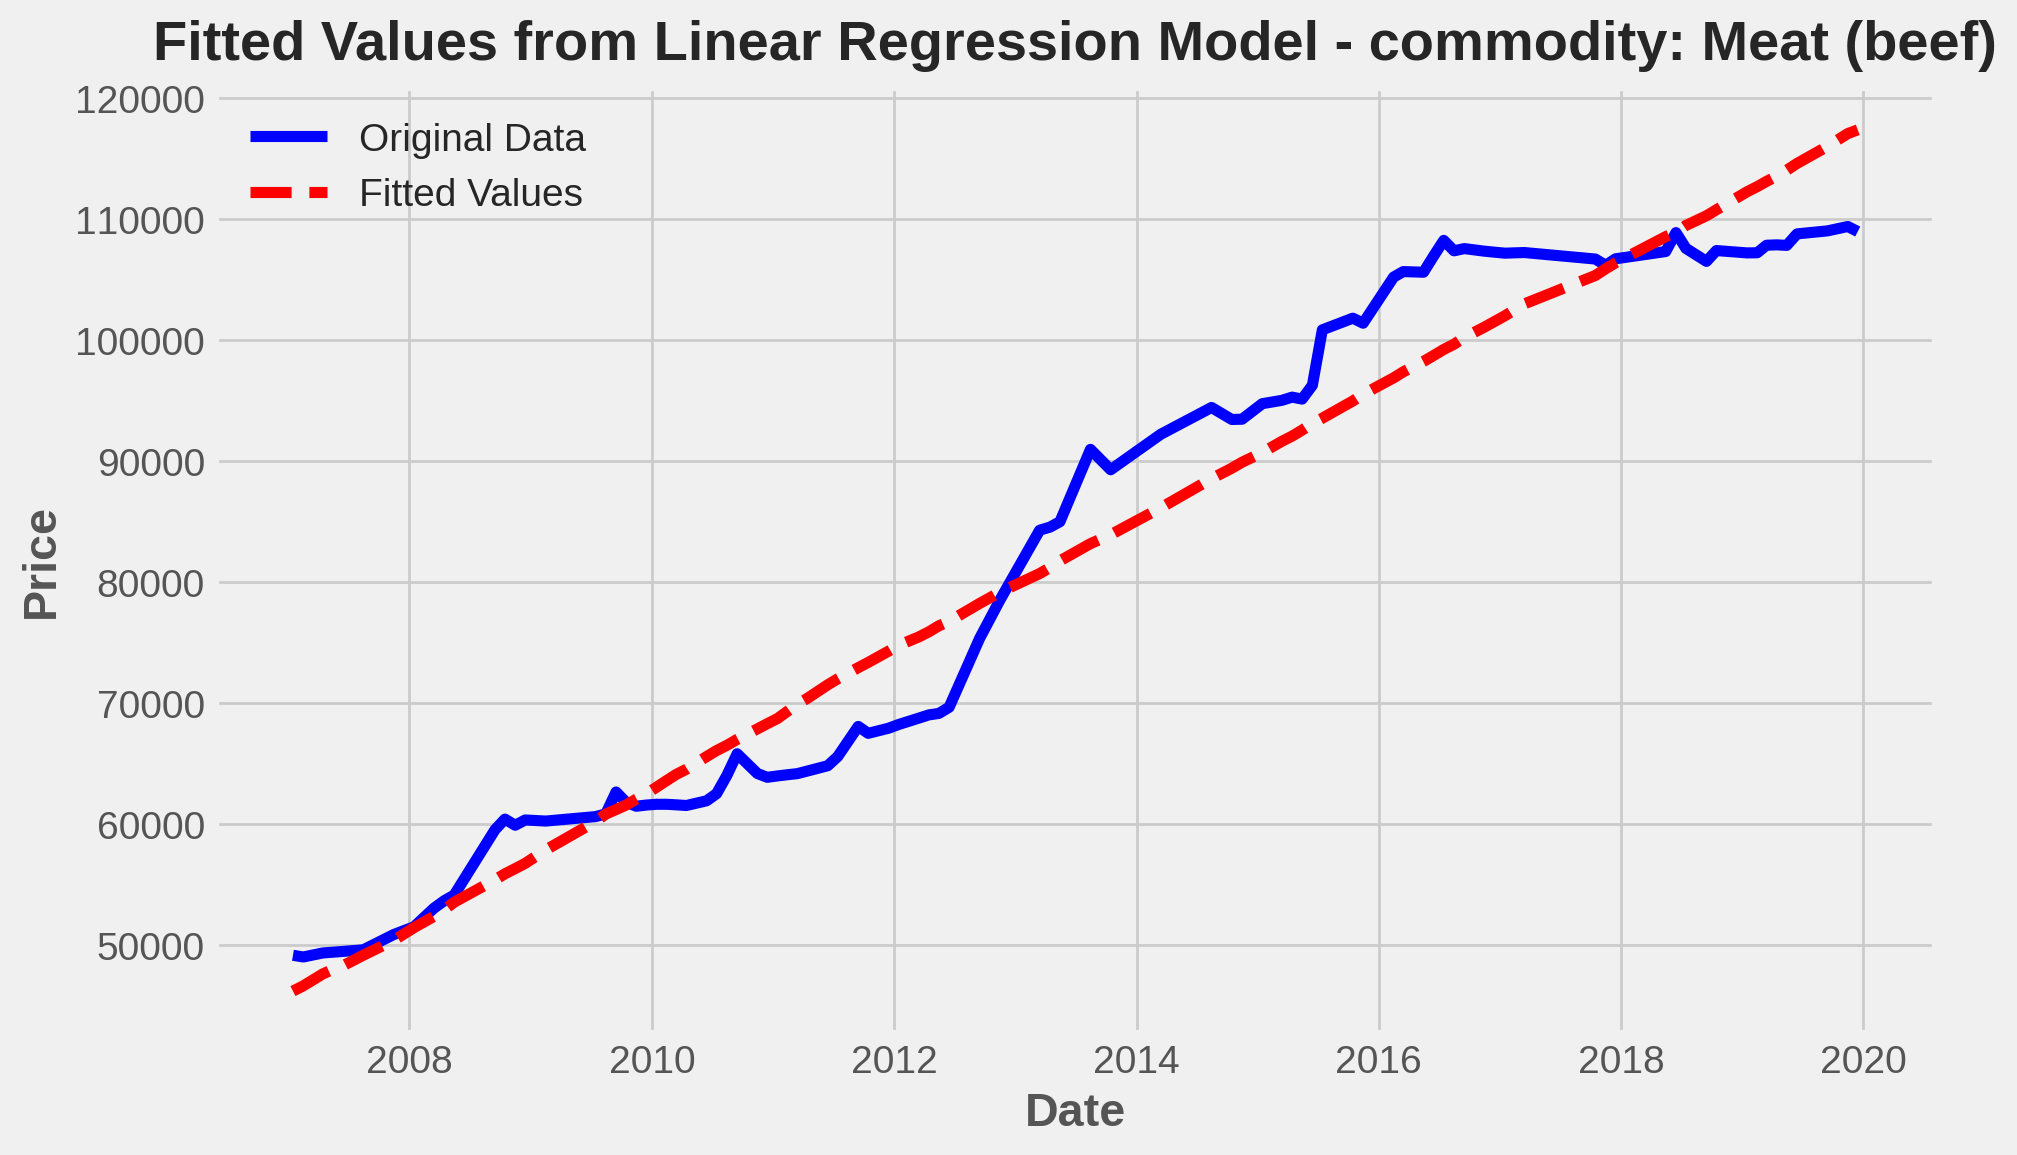

<Figure size 1100x500 with 0 Axes>

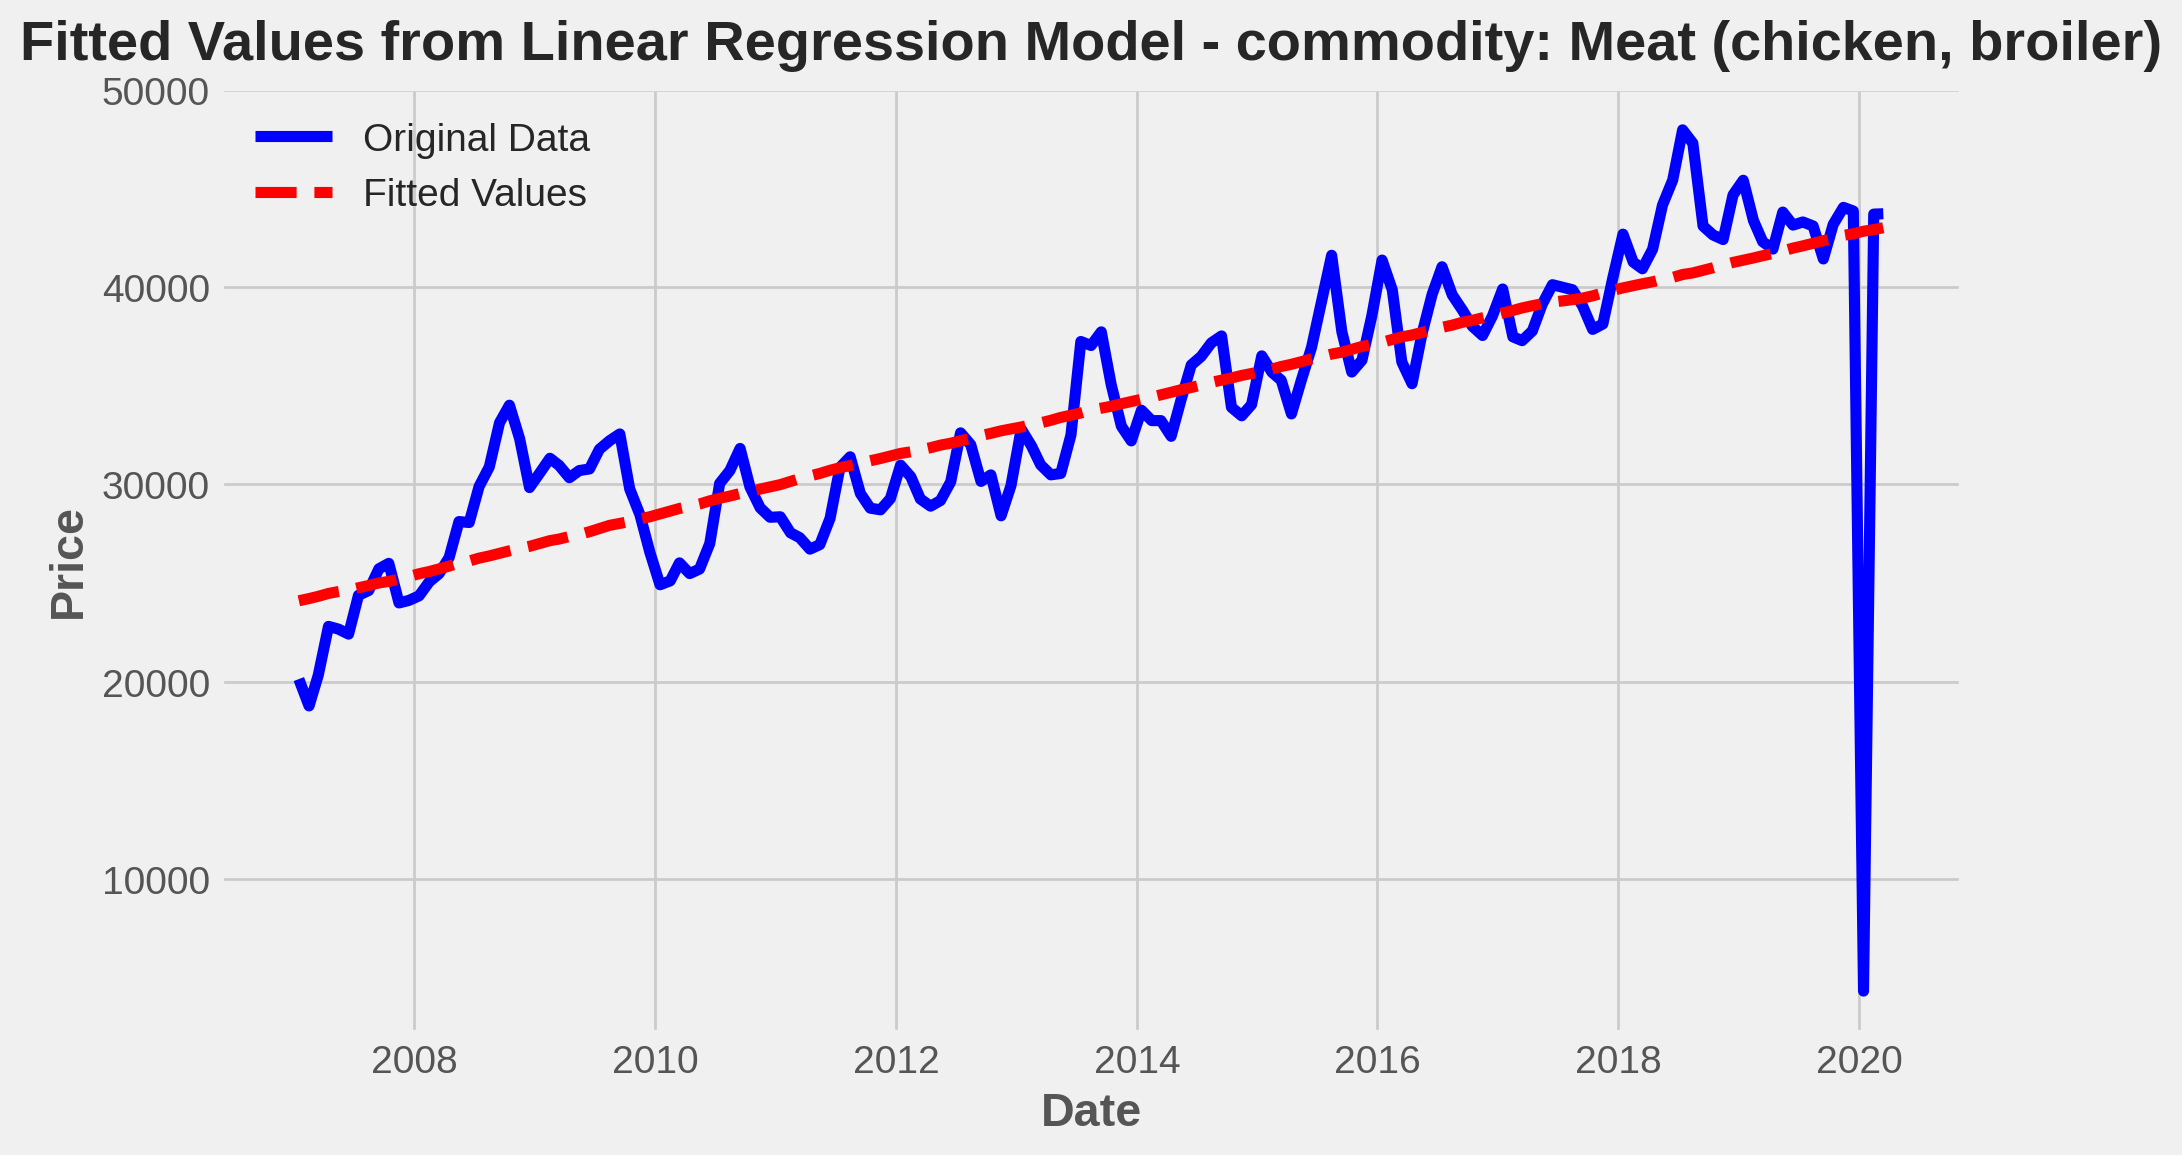

<Figure size 1100x500 with 0 Axes>

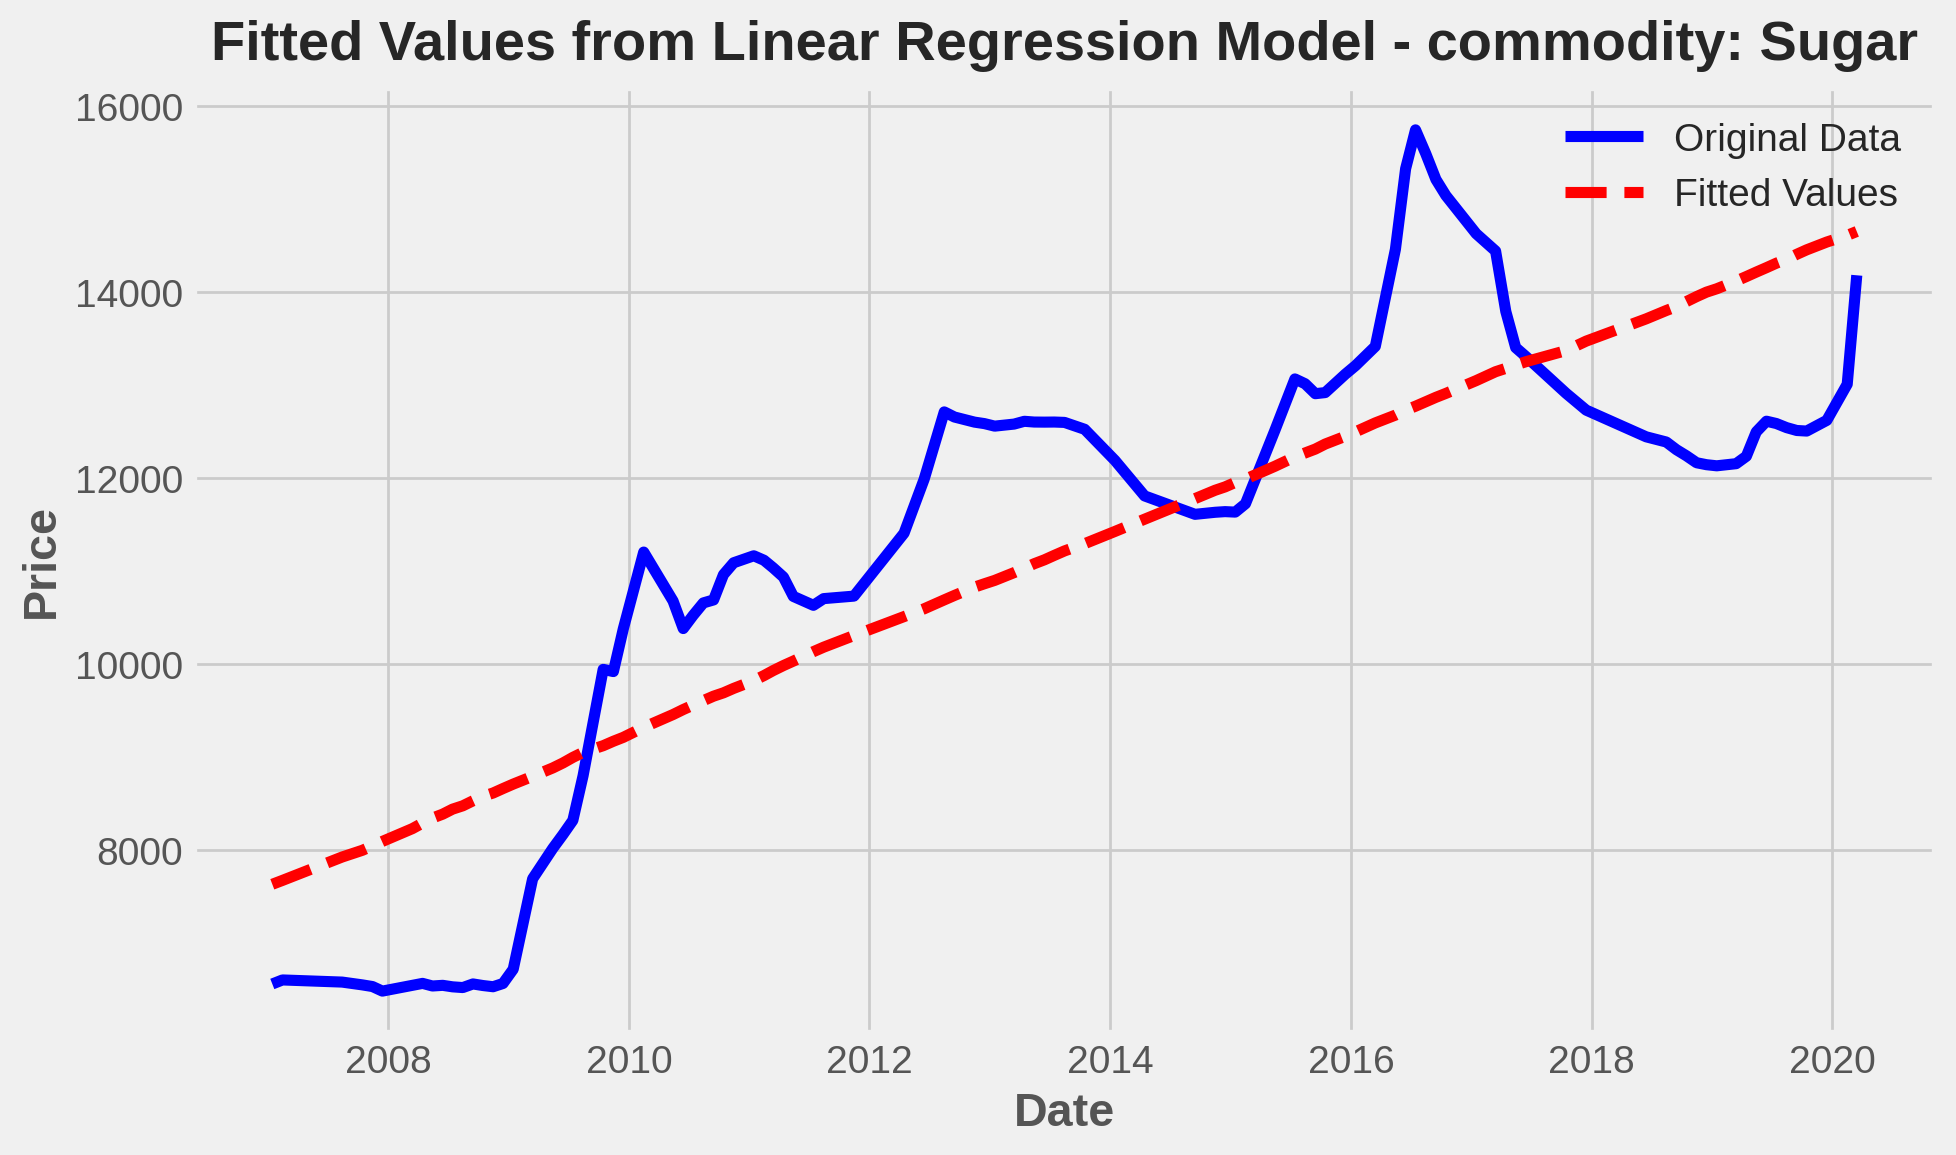

<Figure size 1100x500 with 0 Axes>

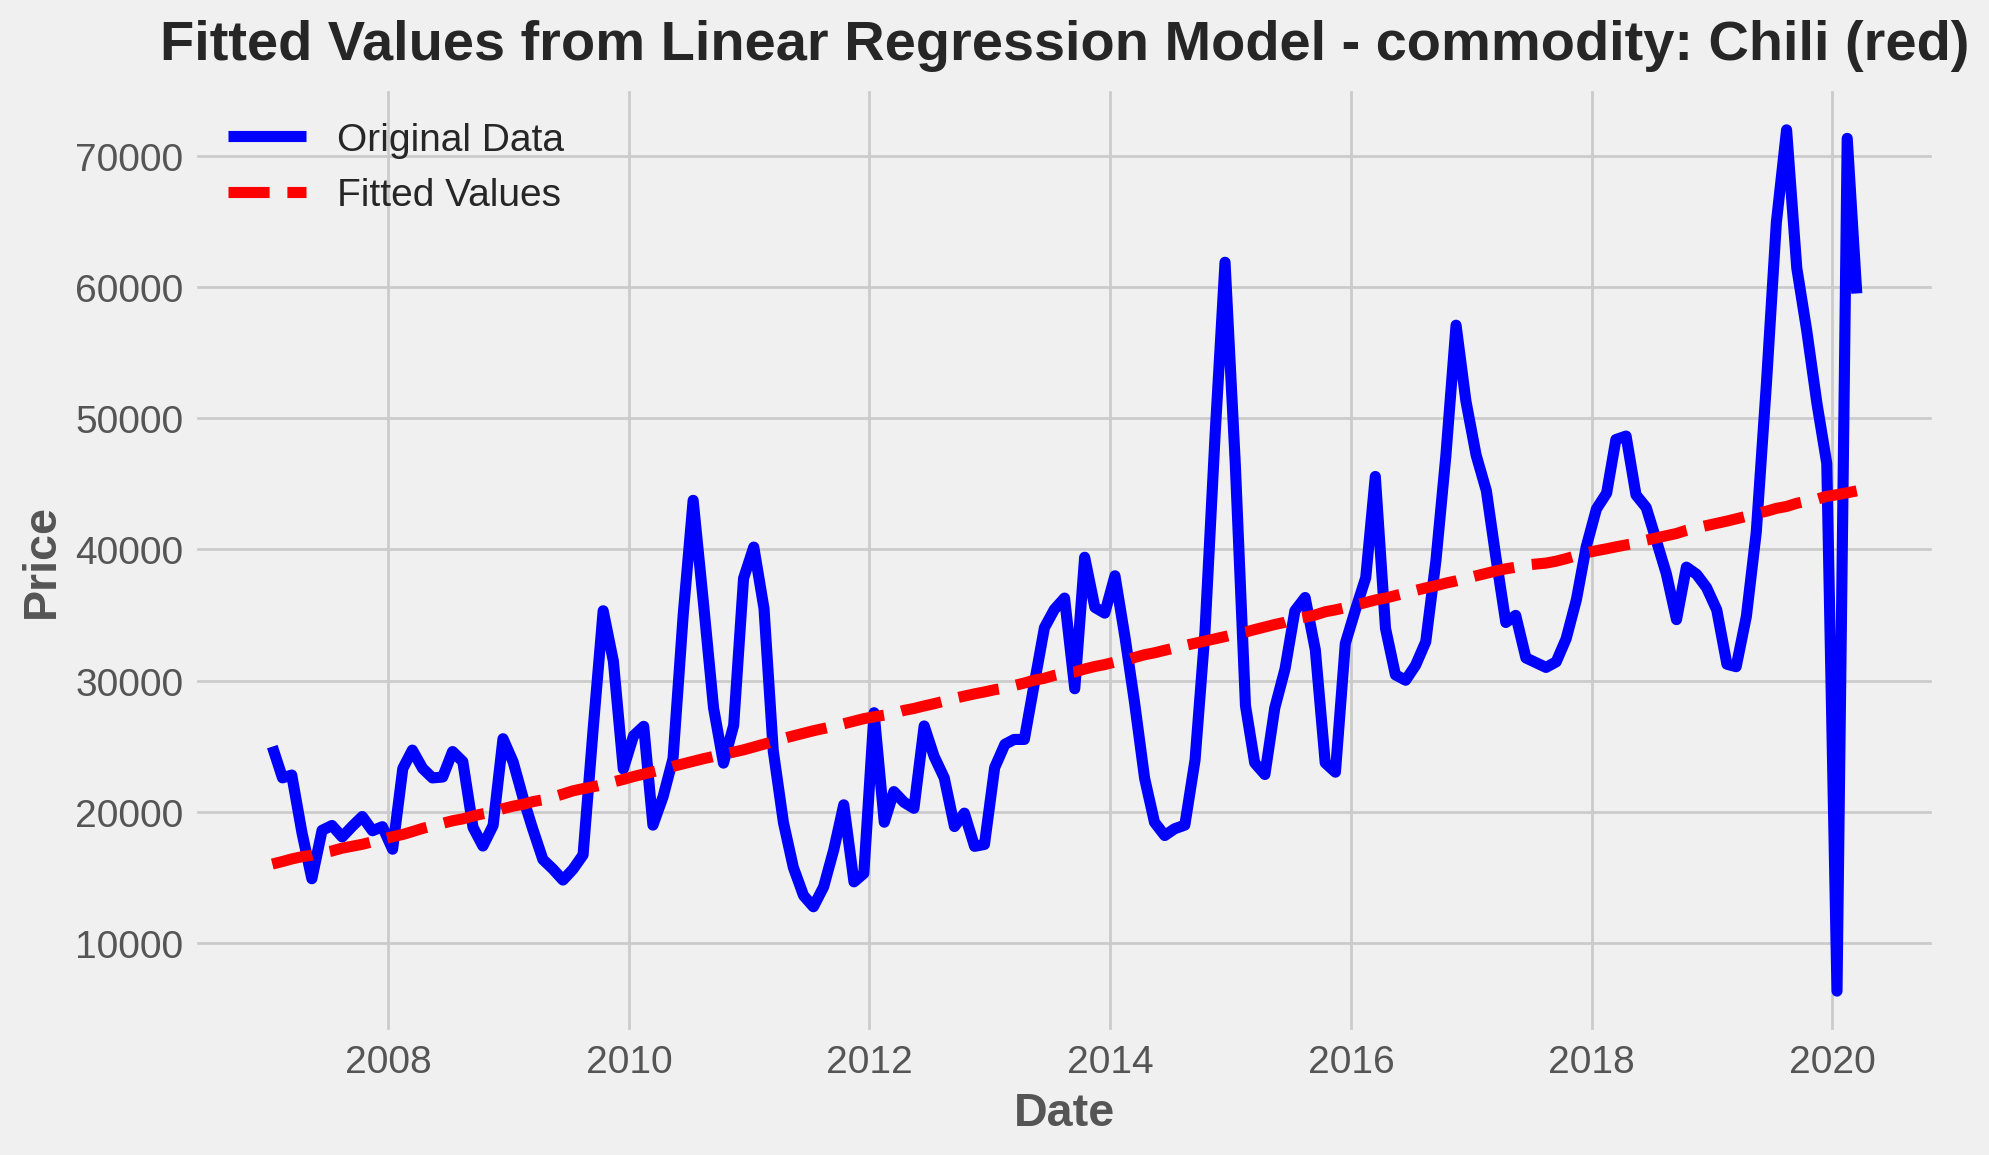

<Figure size 1100x500 with 0 Axes>

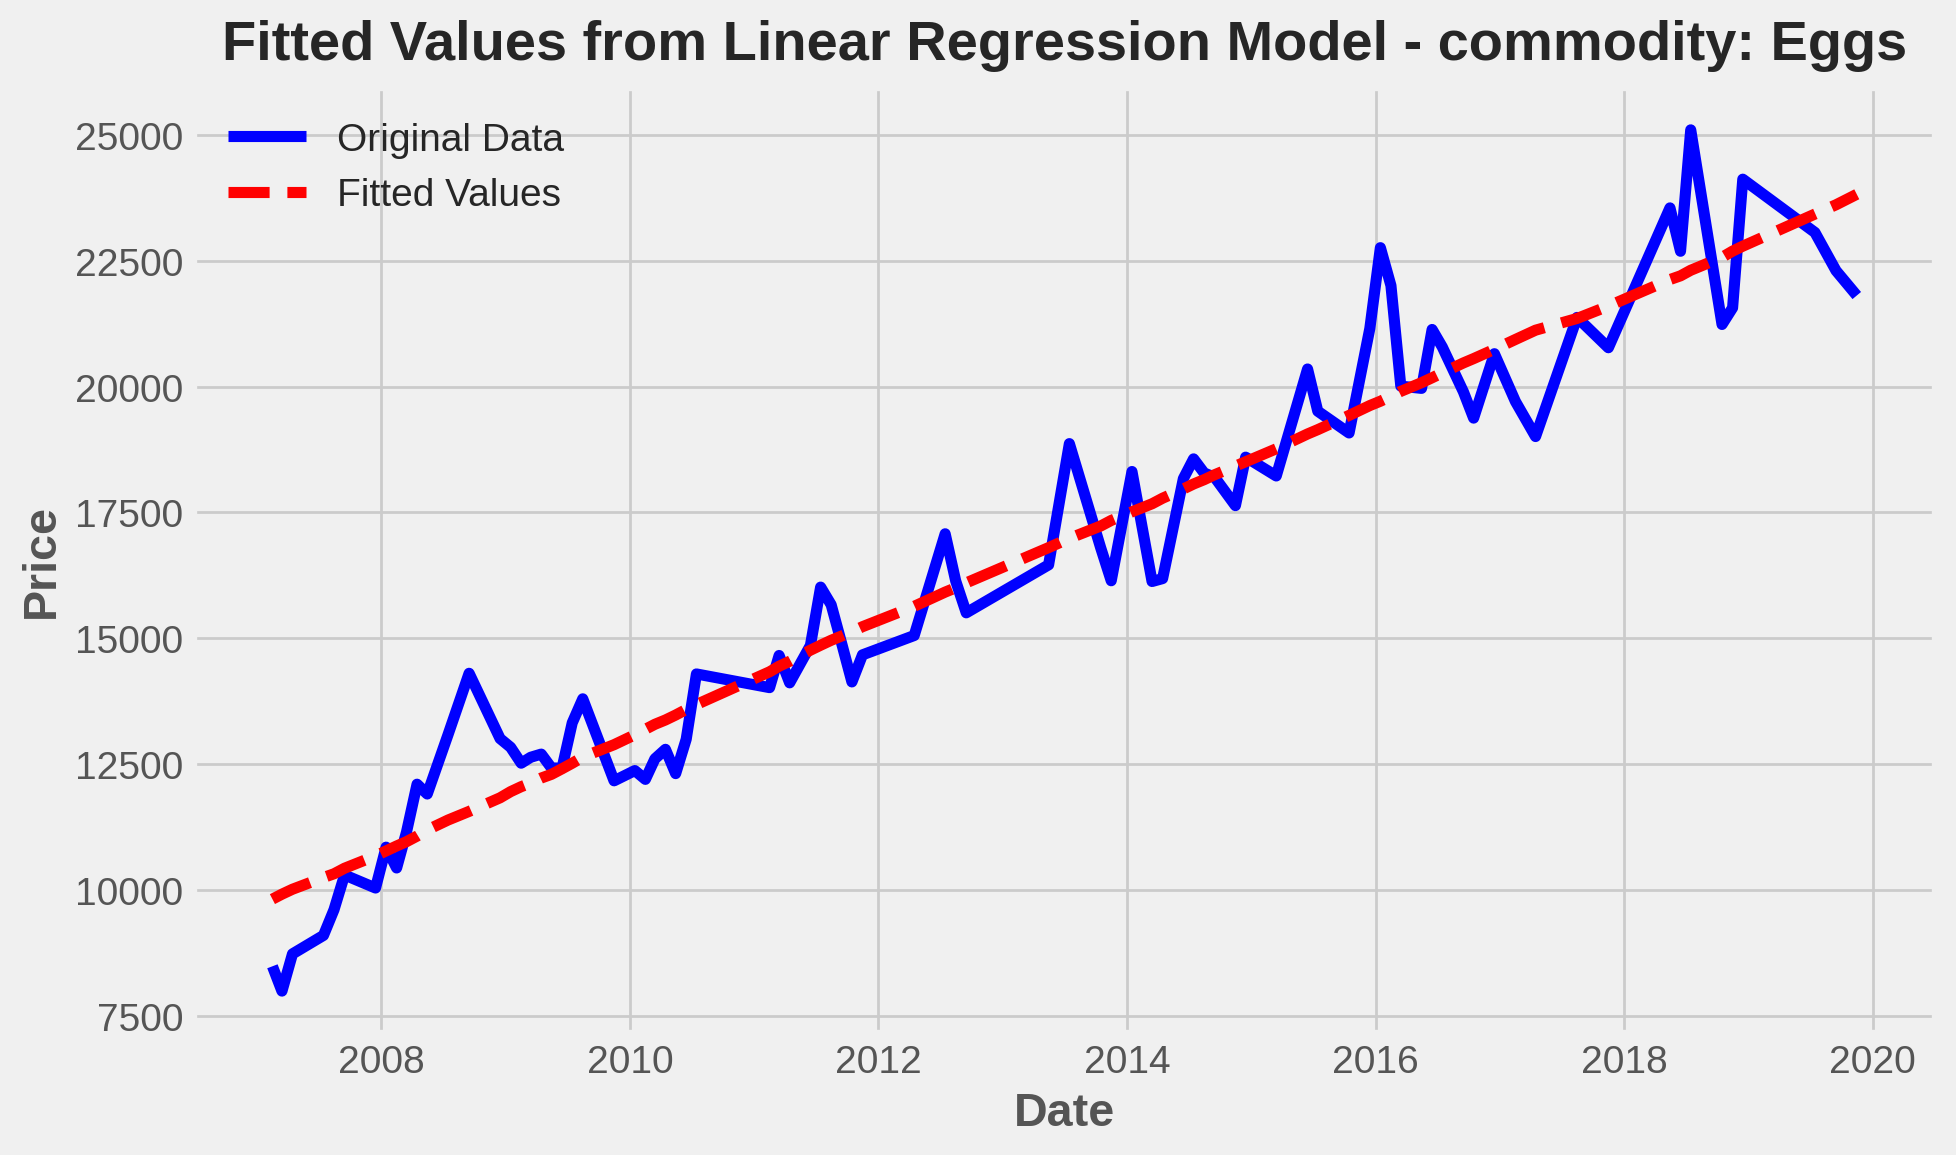

<Figure size 1100x500 with 0 Axes>

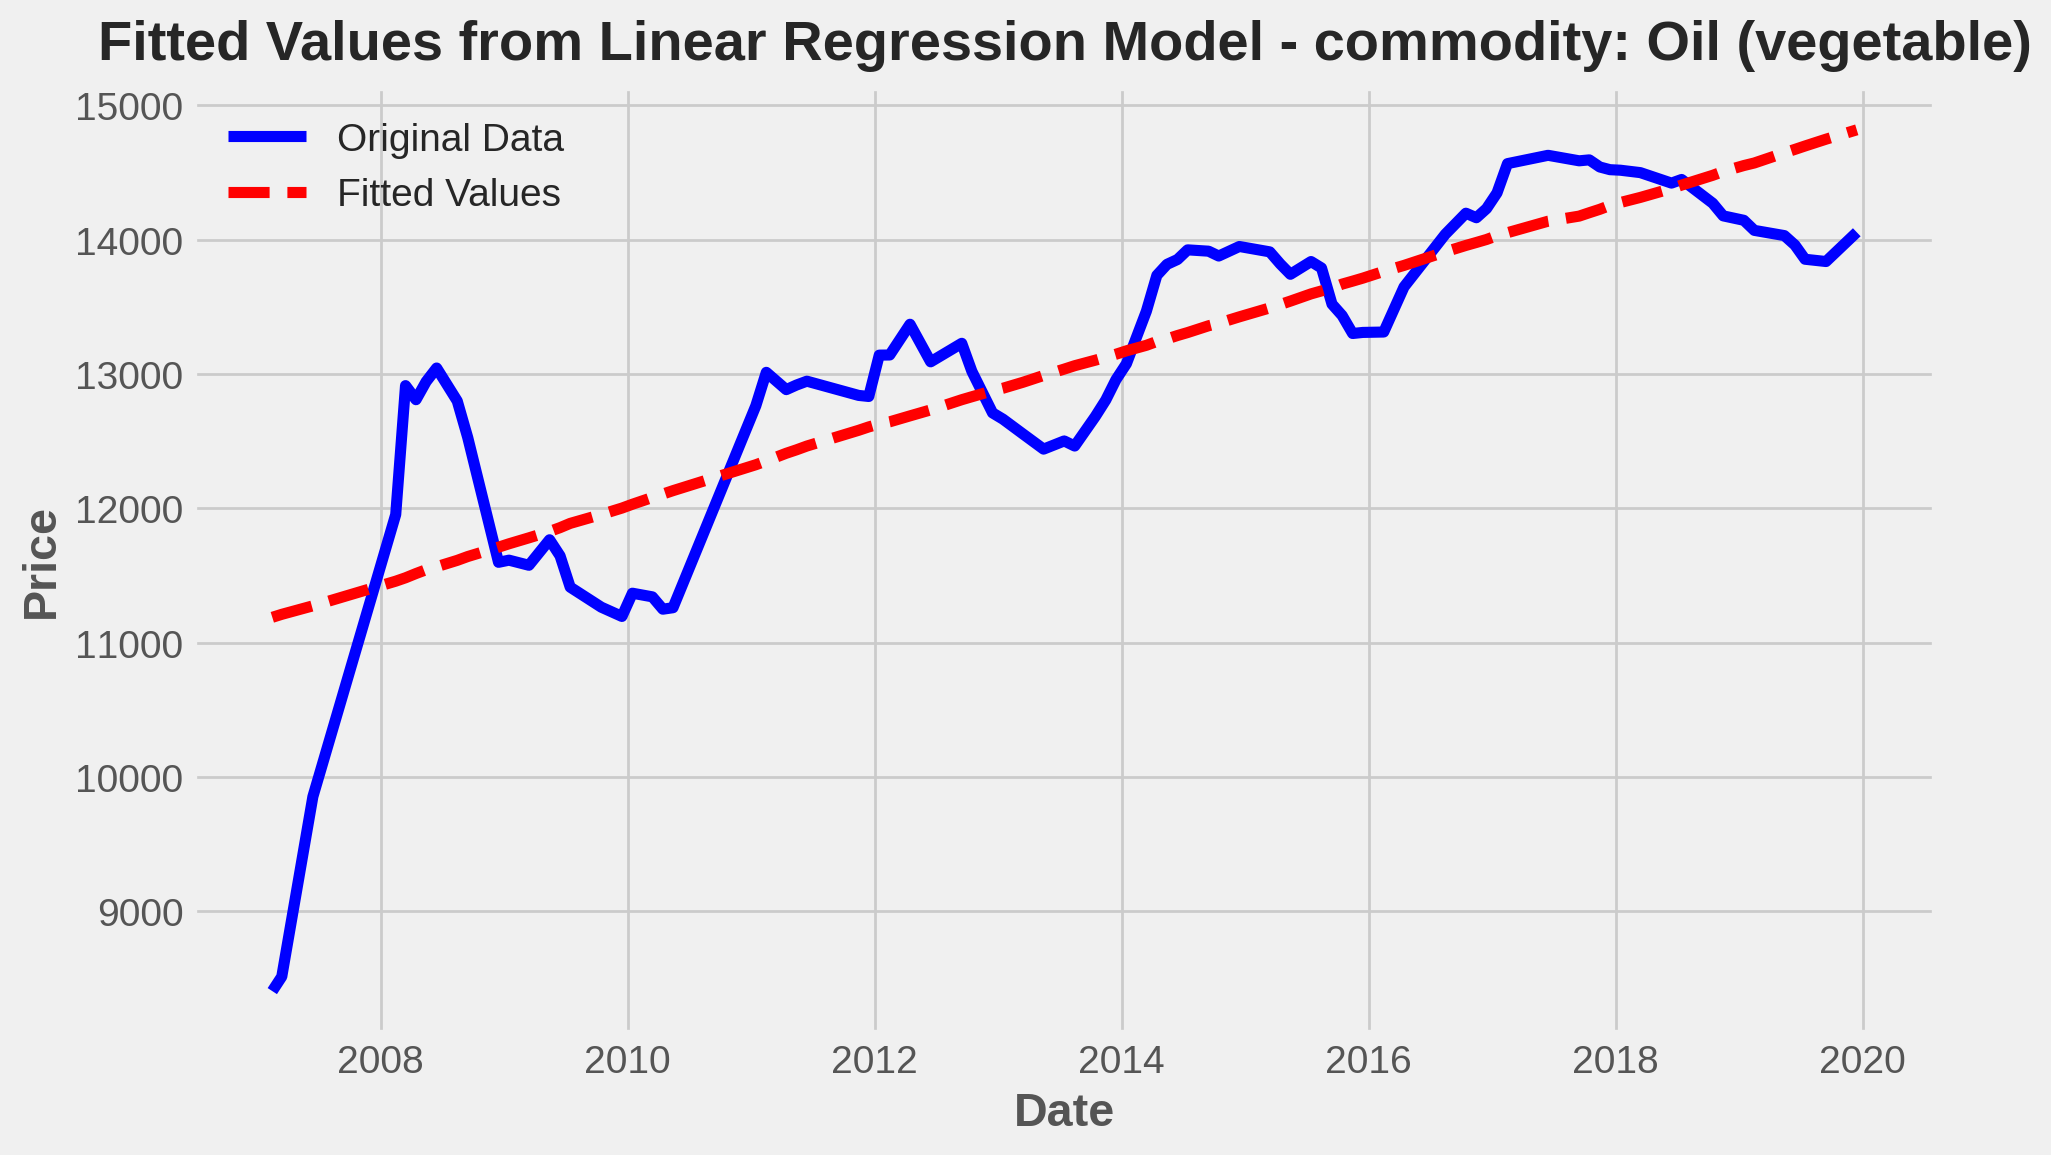

<Figure size 1100x500 with 0 Axes>

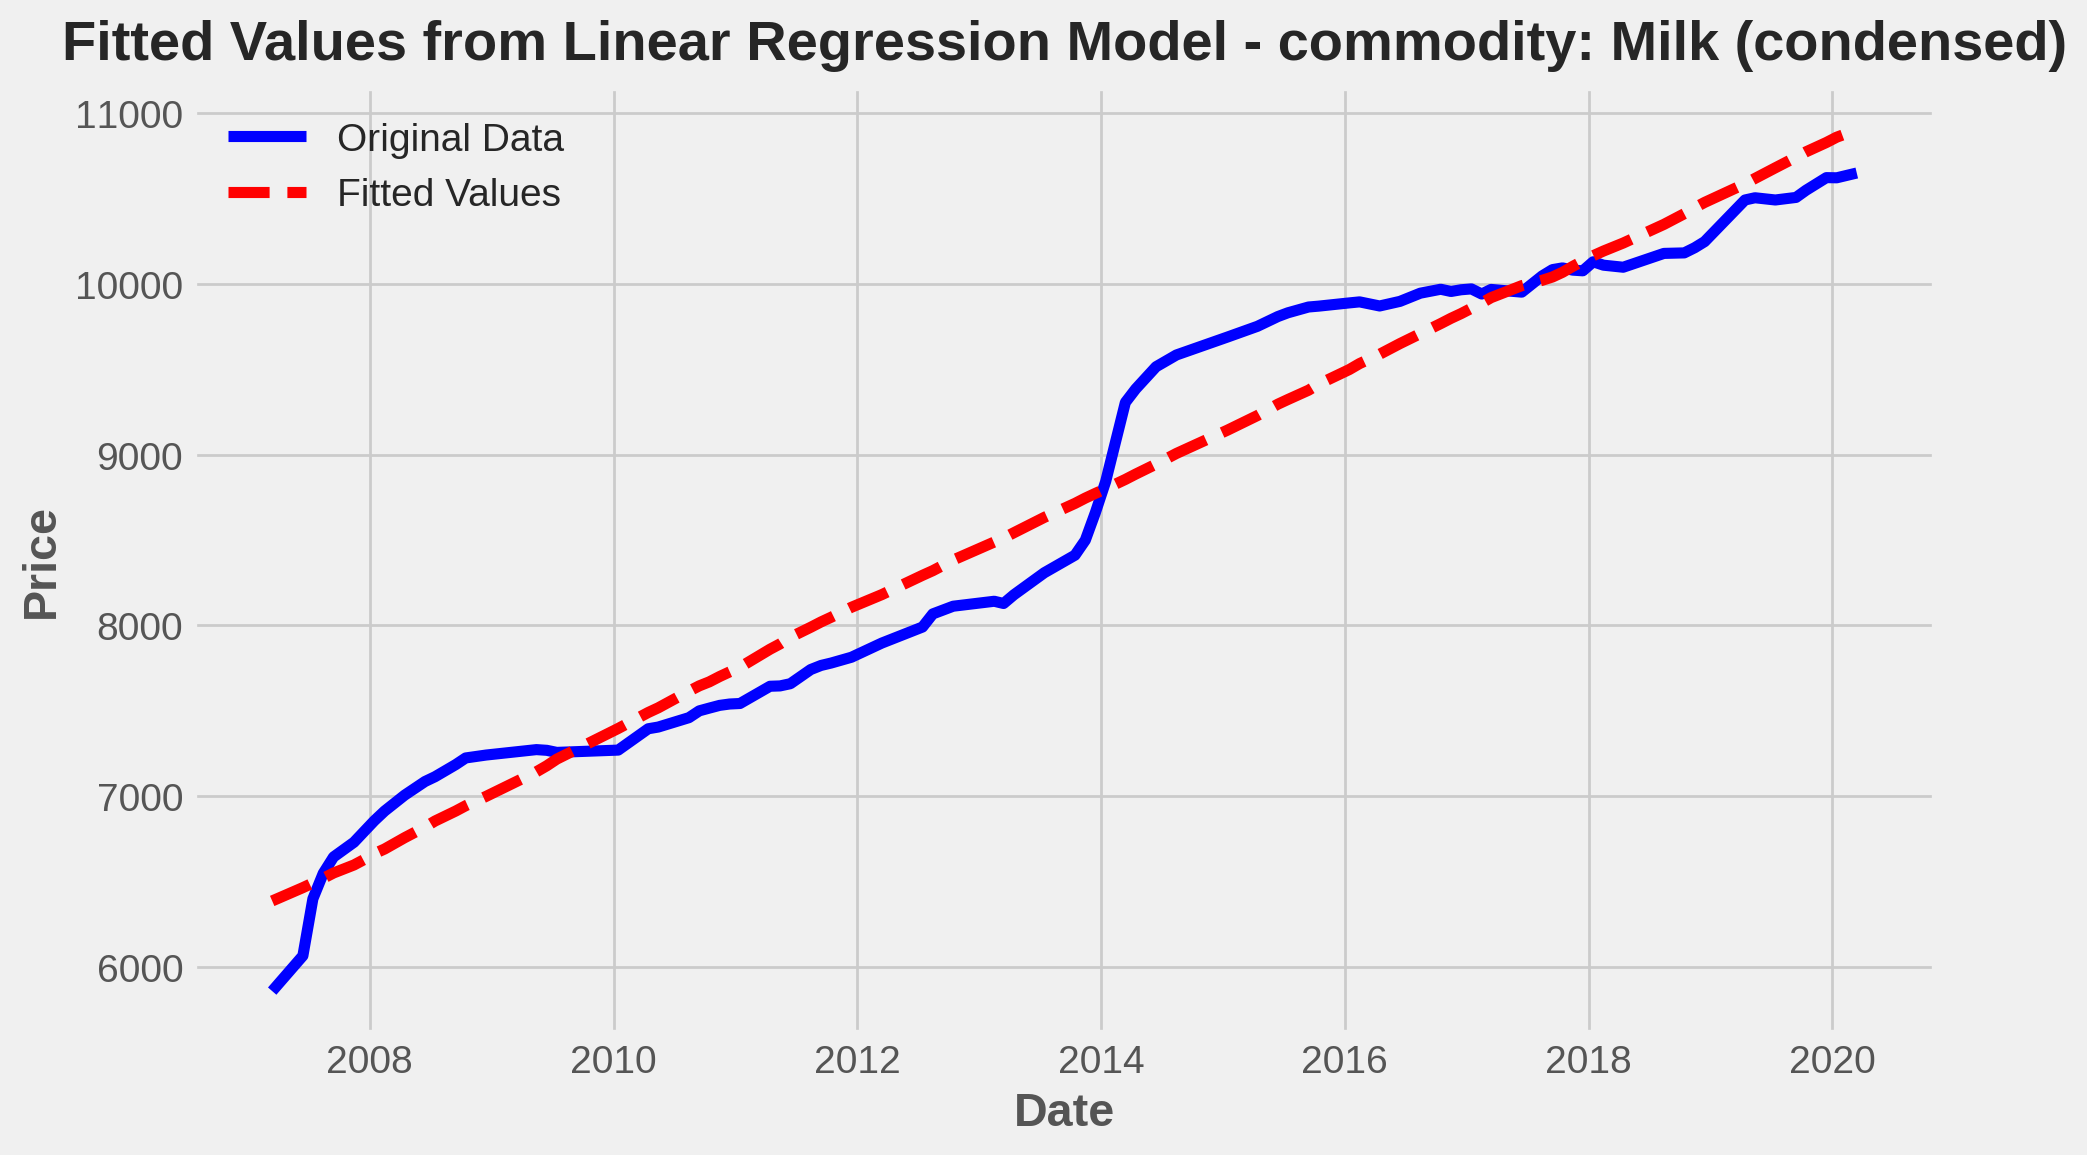

<Figure size 1100x500 with 0 Axes>

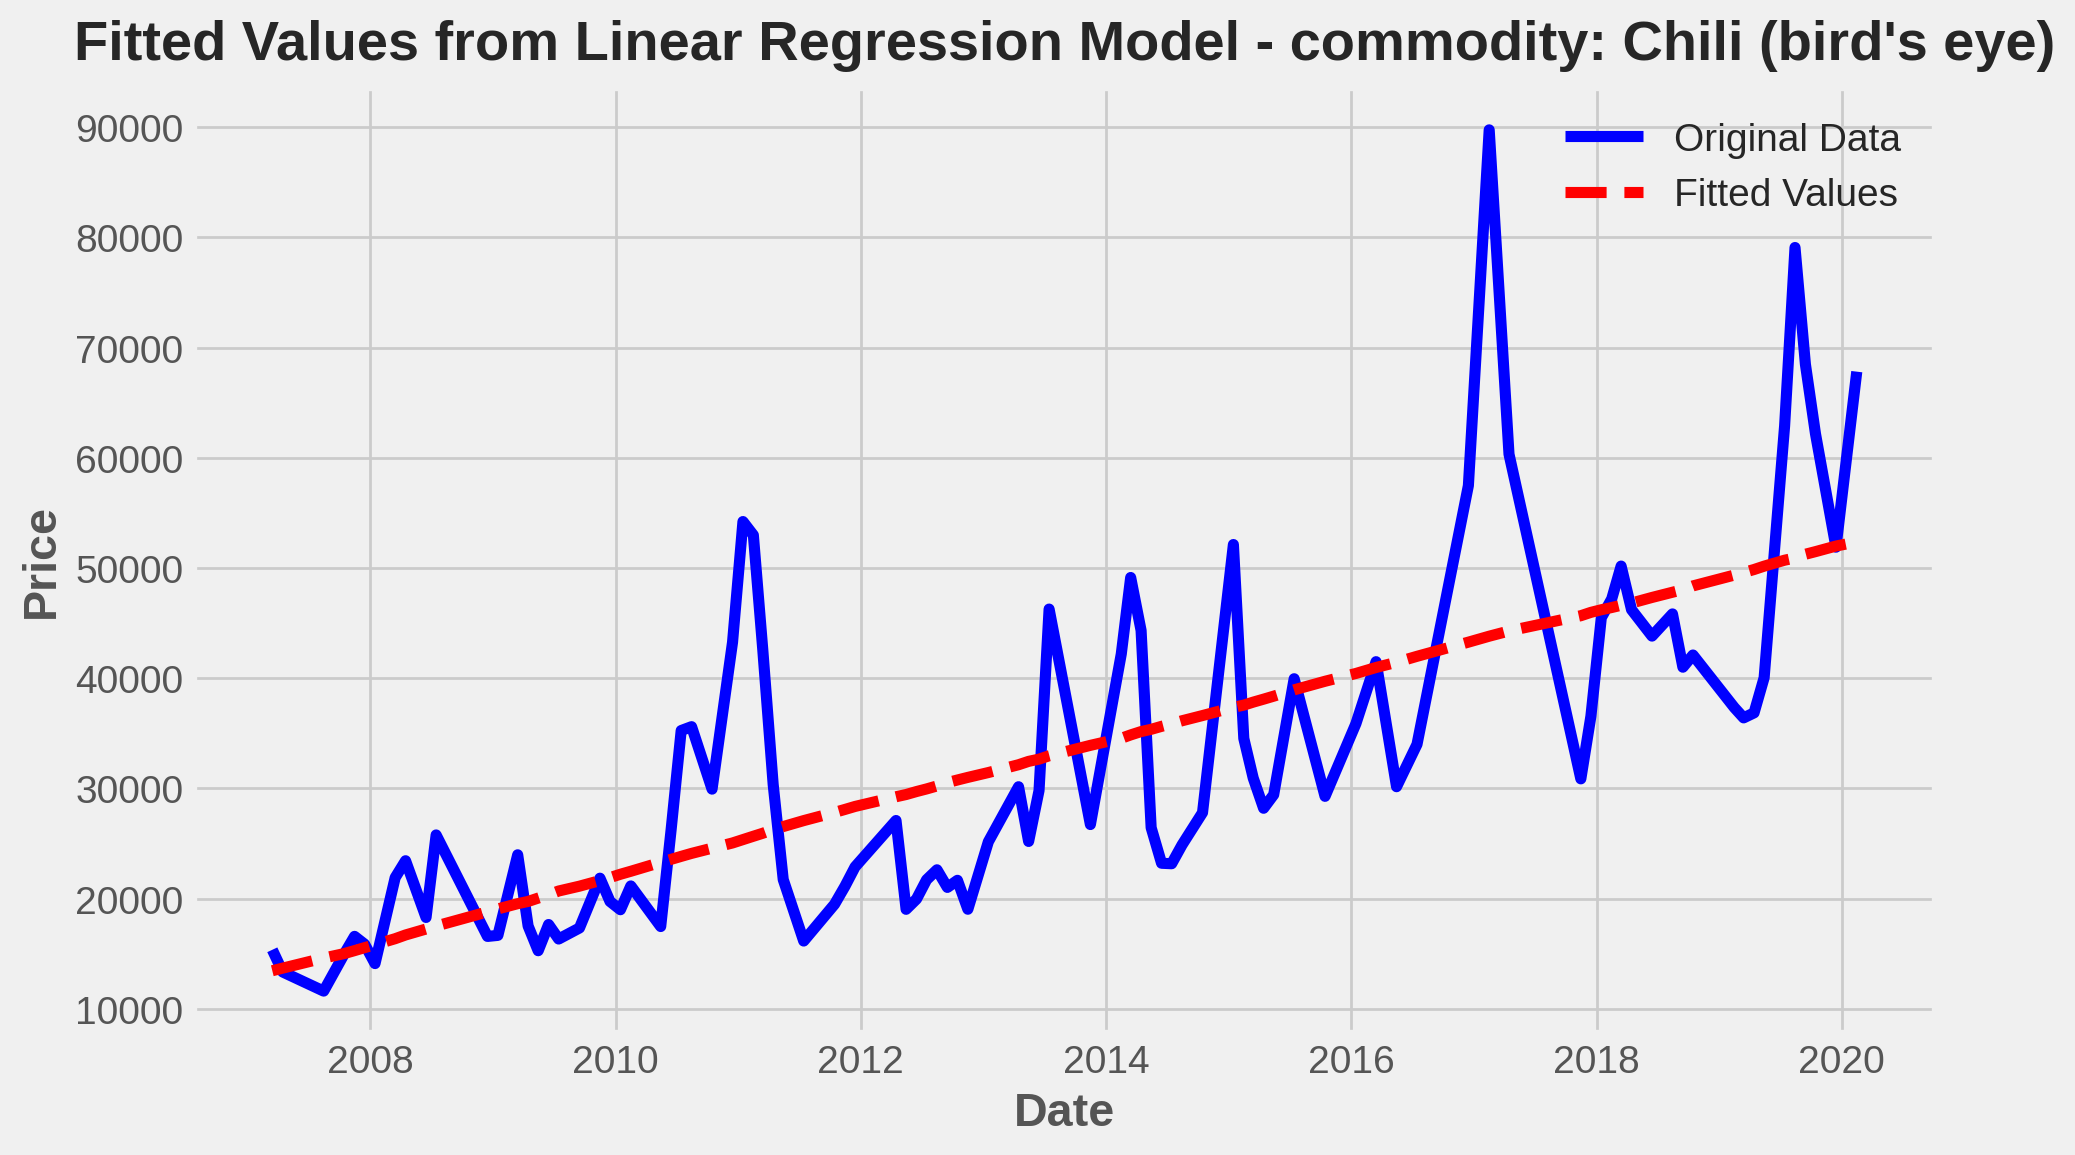

<Figure size 1100x500 with 0 Axes>

In [ ]:
# Get unique commodities
commodities = lr_ts['commodity'].unique()

# Plot original data and fitted values for each commodity
for commodity in commodities:
    # Filter data for the current commodity
    commodity_data = lr_ts[lr_ts['commodity'] == commodity]

    # Training data
    X = commodity_data[['Time']]  # Features (reshape to 2D array)
    y = commodity_data['price']   # Target

    # Train the model
    model = LinearRegression()
    model.fit(X, y)

    # Store the fitted values as a time series with the same time index as the training data
    y_pred = pd.Series(model.predict(X), index=commodity_data.index)

    # Plot original data and fitted values for the current commodity
    plt.figure(figsize=(10, 6))
    plt.plot(commodity_data.index, commodity_data['price'], label='Original Data', color='blue')
    plt.plot(y_pred.index, y_pred, label='Fitted Values', color='red', linestyle='--')
    plt.title(f'Fitted Values from Linear Regression Model - commodity: {commodity}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    plt.tight_layout()

## Egg Price Seasonality




In [ ]:
egg_price = national_food_df[(national_food_df['commodity'] == 'Eggs')]

In [ ]:
egg_price = egg_price.drop(['commodity'], axis=1)

In [ ]:
egg_price.shape

(84, 2)

In [ ]:
egg_price.head()

,date,price
9,2007-02-15,8486.44
18,2007-03-15,7993.55
27,2007-04-15,8732.91
46,2007-07-15,9100.00
53,2007-08-15,9611.00


In [ ]:
egg_price.columns = ['ds', 'y']

In [ ]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


In [ ]:
egg_price_s = egg_price.set_index("ds").to_period("D")
egg_price_s.columns

Index(['y'], dtype='object')

In [ ]:
egg_price_s.head()

,y
ds,
2007-02-15,8486.44
2007-03-15,7993.55
2007-04-15,8732.91
2007-07-15,9100.00
2007-08-15,9611.00


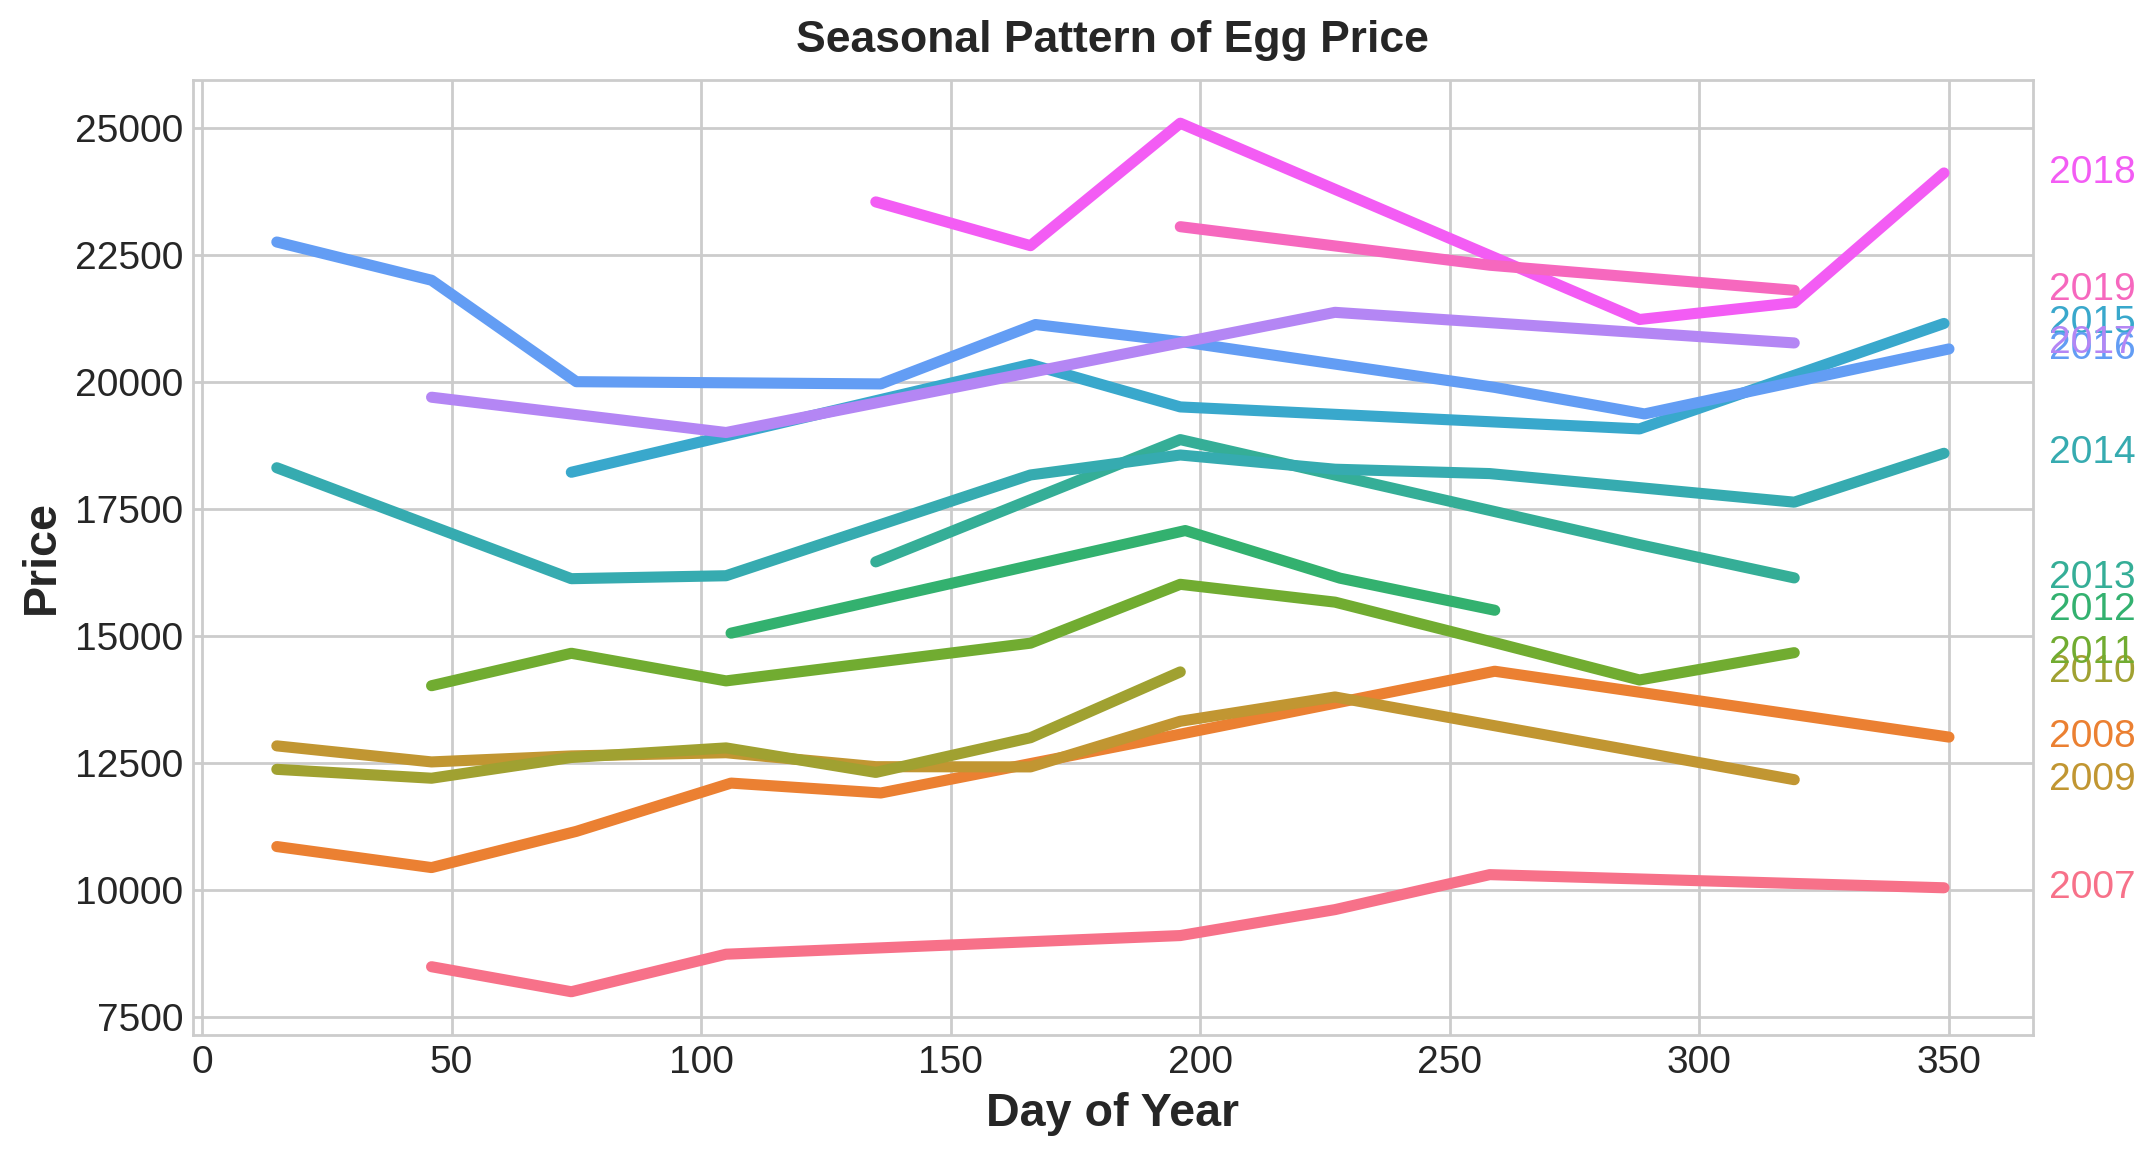

In [ ]:
X = egg_price_s.copy()

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year

# Create a figure with only one subplot
fig, ax1 = plt.subplots(figsize=(11, 6))

# Plot the seasonal pattern on ax1
seasonal_plot(X, y="y", period="year", freq="dayofyear", ax=ax1)

# Optionally, add titles, labels, etc.
ax1.set_title("Seasonal Pattern of Egg Price")
ax1.set_xlabel("Day of Year")
ax1.set_ylabel("Price")

# Show the plot
plt.show()


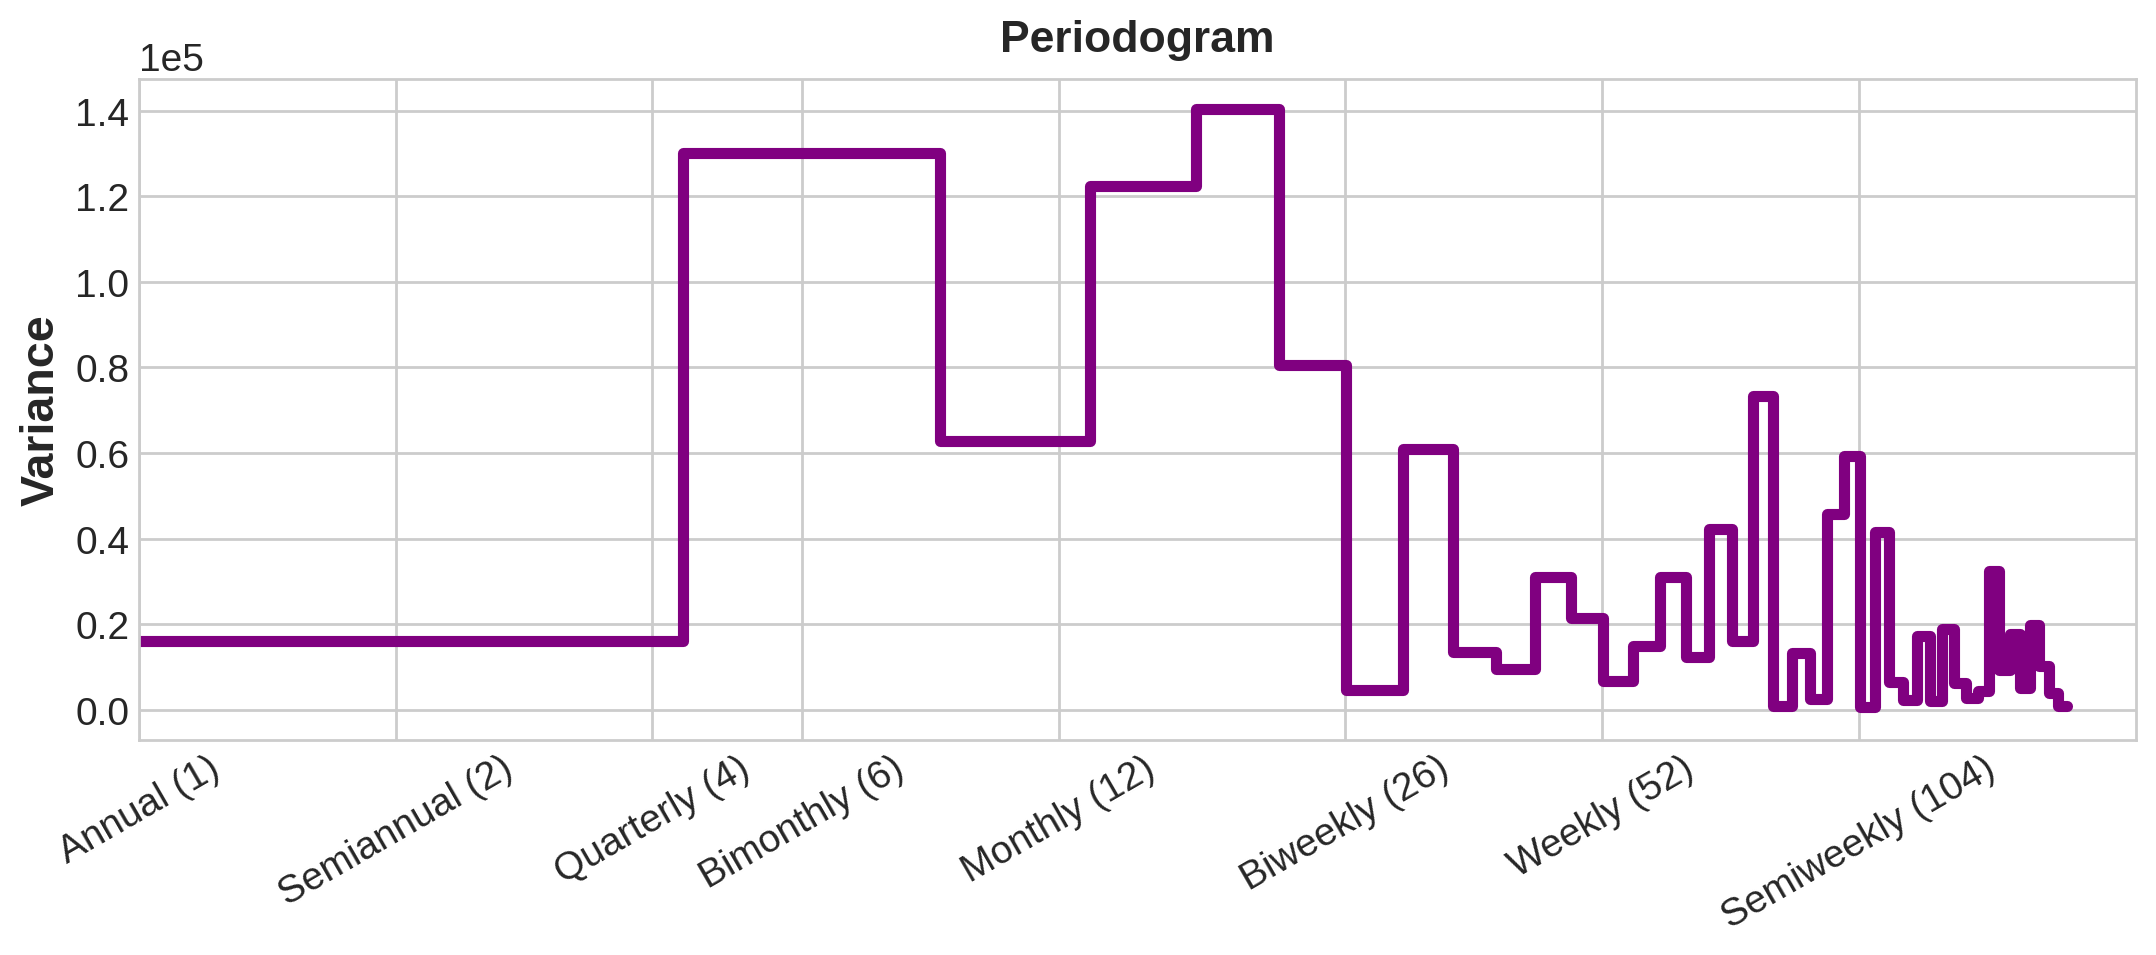

In [ ]:
plot_periodogram(egg_price_s.y);

# Model Fitting For Egg Price


In [ ]:
# Split the egg_price dataset into training and validation sets using random sampling
# 80% of the data is sampled for training, while the remaining 20% is used for validation
train_data = egg_price.sample(frac=0.8, random_state=10)
validation_data = egg_price.drop(train_data.index)

# Print the sizes of the training and validation datasets
print(f'Training data size: {train_data.shape}')
print(f'Validation data size: {validation_data.shape}')

# Reset the index of the training and validation datasets to ensure continuous indexing
train_data = train_data.reset_index()
validation_data = validation_data.reset_index()

Training data size: (67, 2)
Validation data size: (17, 2)


In [ ]:
egg_price_2018 = egg_price[egg_price['ds'].dt.year == 2018]

In [ ]:
egg_price_2018.tail()

,ds,y
1057,2018-06-15,22688.0
1066,2018-07-15,25100.0
1087,2018-10-15,21234.0
1097,2018-11-15,21565.0
1105,2018-12-15,24120.0


In [ ]:
%%time
m = Prophet()
m.fit(train_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpki5ja24j/4oysxmir.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpki5ja24j/ic8mdbq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41790', 'data', 'file=/tmp/tmpki5ja24j/4oysxmir.json', 'init=/tmp/tmpki5ja24j/ic8mdbq2.json', 'output', 'file=/tmp/tmpki5ja24j/prophet_modelv0fb35rn/prophet_model-20240509063337.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:33:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:33:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 103 ms, sys: 6.5 ms, total: 109 ms
Wall time: 782 ms


# Model Evaluation

In [ ]:
# Generate predictions using the Prophet model for the validation data
prediction = m.predict(pd.DataFrame({'ds': validation_data['ds']}))

# Extract the actual and predicted values from the validation dataset and predictions
y_actual = validation_data['y']
y_predicted = prediction['yhat']

# Convert predicted values to integers for evaluation metrics
y_predicted = y_predicted.astype(int)


In [ ]:
# Create a subplot with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add actual targets data to the subplot
fig.add_trace(
    go.Scatter(x=validation_data['ds'], y=y_actual, name="Actual Targets"),
    secondary_y=False,
)

# Add predicted targets data to the subplot
fig.add_trace(
    go.Scatter(x=validation_data['ds'], y=y_predicted, name="Predicted Targets"),
    secondary_y=True,
)

# Update layout settings
fig.update_layout(
    title_text="Actual vs Predicted Targets",  # Set title
    xaxis_title="Timeline",  # Set x-axis label
)

# Update y-axis labels
fig.update_yaxes(title_text="Actual Targets", secondary_y=False)
fig.update_yaxes(title_text="Predicted Targets", secondary_y=True)

# Show the plot
fig.show()


In [ ]:
mean_absolute_percentage_error(y_actual, y_predicted)

0.09496595638942973

# Forecasting


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
427,2020-11-10
428,2020-11-11
429,2020-11-12
430,2020-11-13
431,2020-11-14


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
427,2020-11-10,23359.976581,22430.816022,24275.399227
428,2020-11-11,23508.925500,22503.613330,24417.894901
429,2020-11-12,23616.877347,22640.317579,24577.989798
430,2020-11-13,23685.818372,22766.076574,24629.013933
431,2020-11-14,23718.700431,22690.304743,24656.895534


In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

# References


*   https://facebook.github.io/prophet/docs/quick_start.html
*   https://otexts.com/fpp3/
*   https://mkang32.github.io/python/2020/12/15/prophet-intro.html
*   https://www.kaggle.com/code/robikscube/time-series-forecasting-with-prophet-yt
*   https://www.analyticsvidhya.com/blog/2022/04/an-end-to-end-guide-on-time-series-forecasting-using-fbprophet/
*   https://www.kaggle.com/learn/time-series
*   https://www.kaggle.com/code/thebrownviking20/everything-you-can-do-with-a-time-series






# Future Works
* high order polynomial linear regression https://www.kaggle.com/code/ryanholbrook/hybrid-models?scriptVersionId=126573810&cellId=4
* adding holiday features
* using hybrid models